# 图像特征提取

In [1]:
!wget https://github.com/wkwbk/ipynb/raw/main/%E4%BA%BA%E5%B7%A5%E6%99%BA%E8%83%BD/%E6%A0%91%E5%8F%B6.jpeg

--2025-04-15 07:56:57--  https://github.com/wkwbk/ipynb/raw/main/%E4%BA%BA%E5%B7%A5%E6%99%BA%E8%83%BD/%E6%A0%91%E5%8F%B6.jpeg
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/wkwbk/ipynb/main/%E4%BA%BA%E5%B7%A5%E6%99%BA%E8%83%BD/%E6%A0%91%E5%8F%B6.jpeg [following]
--2025-04-15 07:56:57--  https://raw.githubusercontent.com/wkwbk/ipynb/main/%E4%BA%BA%E5%B7%A5%E6%99%BA%E8%83%BD/%E6%A0%91%E5%8F%B6.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 651971 (637K) [image/jpeg]
Saving to: ‘树叶.jpeg’

树叶.jpeg           100%[===================>] 636.69K  --.-KB/s    in 0.04s   

2025-04-15 07:56:57 (16.3

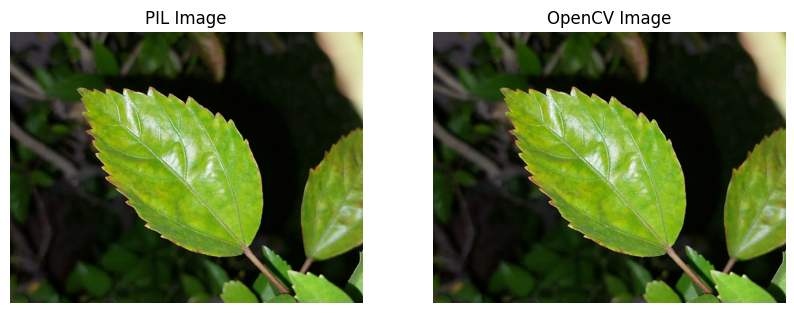

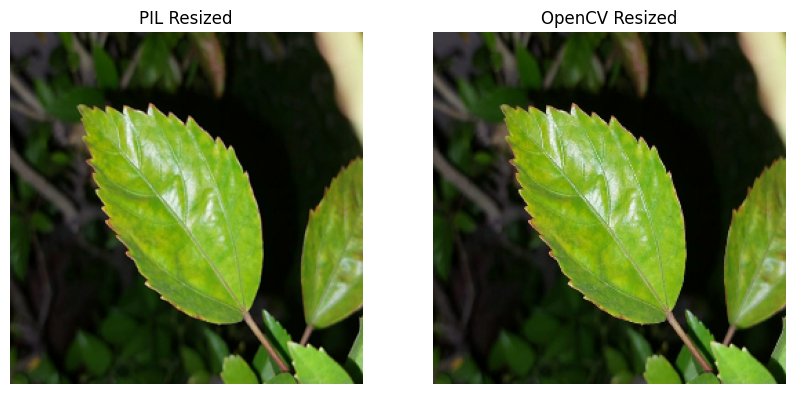

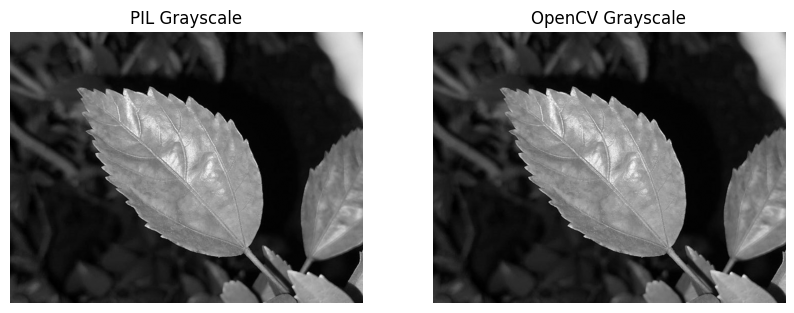

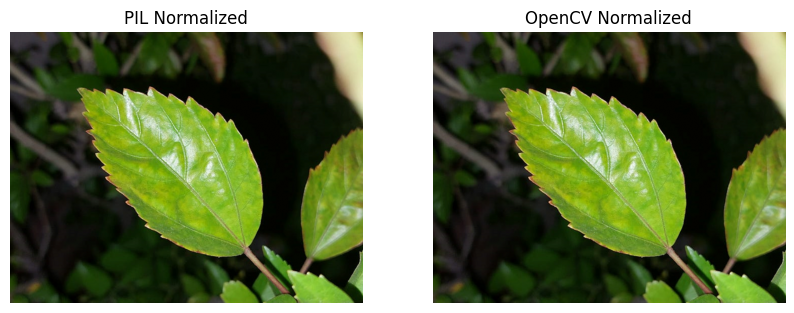

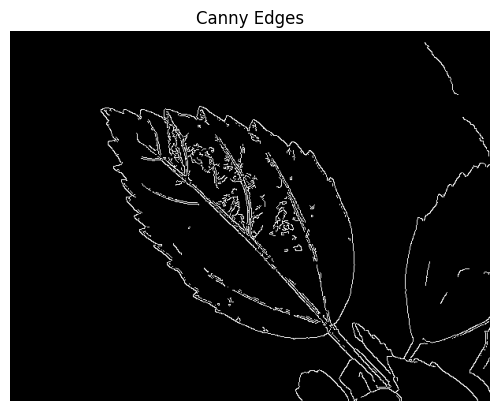

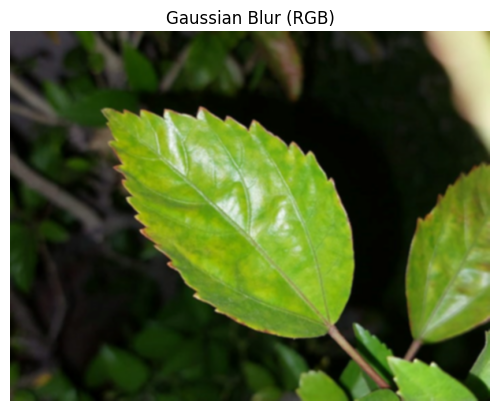

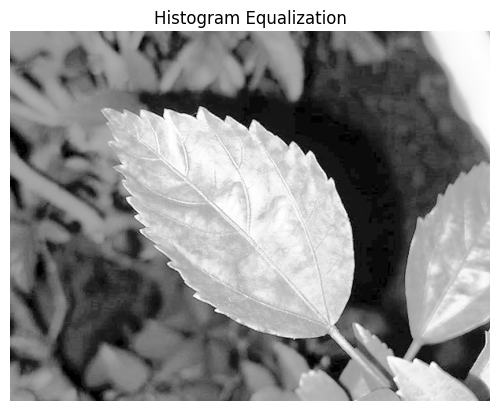

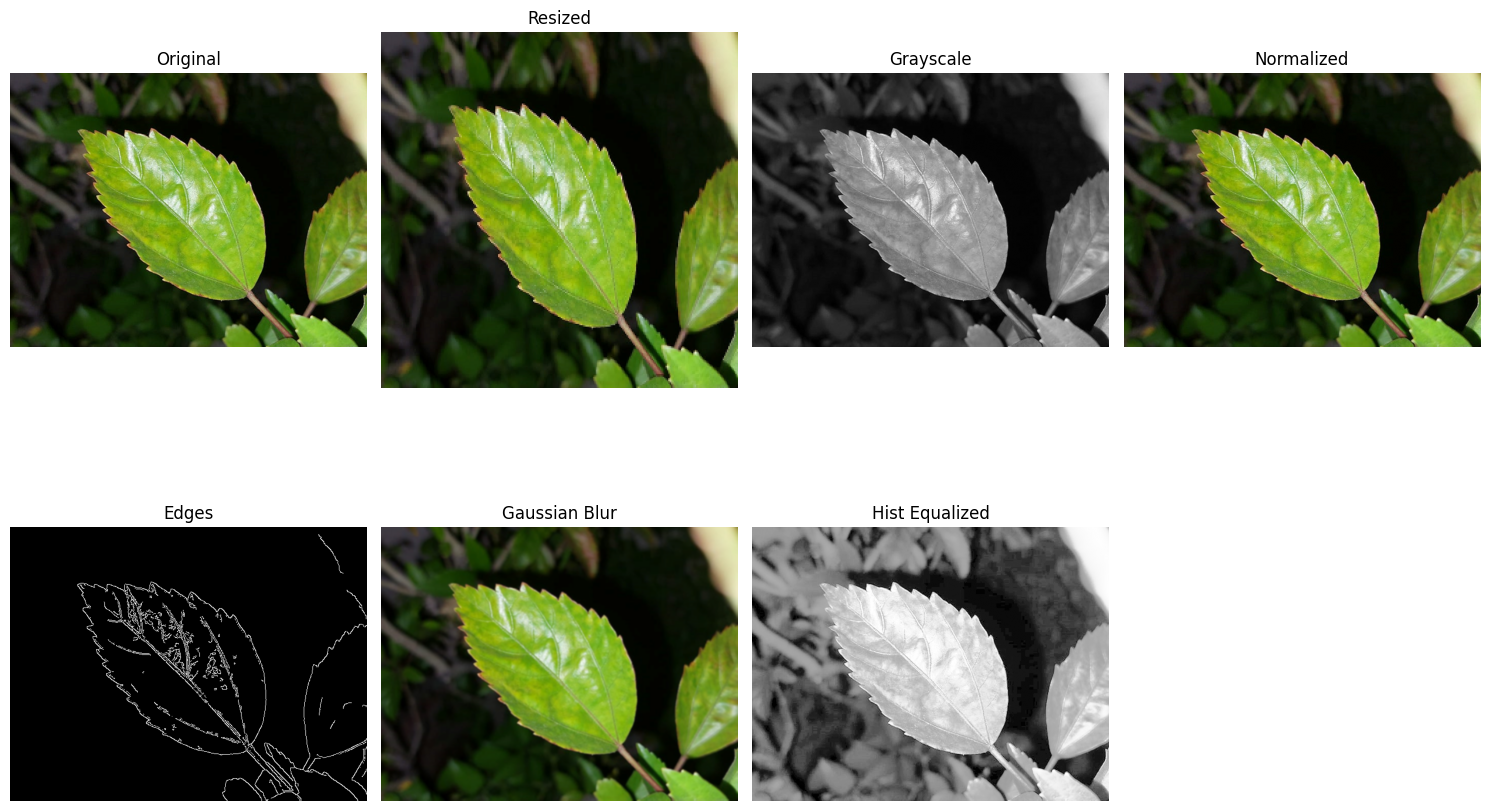

In [2]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# 1. 加载图像（处理颜色空间）
image_cv = cv2.imread('树叶.jpeg')  # OpenCV读取为BGR
image_cv_rgb = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)  # 转为RGB
image_pil = Image.open('树叶.jpeg')  # PIL读取为RGB

# 显示原始图像对比
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_pil)
plt.title('PIL Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_cv_rgb)
plt.title('OpenCV Image')
plt.axis('off')
plt.show()

# 2. 调整图像大小
# 使用PIL调整大小
resized_pil = image_pil.resize((256, 256))
# 使用OpenCV调整大小
resized_cv = cv2.resize(image_cv, (256, 256))
resized_cv_rgb = cv2.cvtColor(resized_cv, cv2.COLOR_BGR2RGB)  # 转换颜色

# 显示调整后的图像
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(resized_pil)
plt.title('PIL Resized')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(resized_cv_rgb)
plt.title('OpenCV Resized')
plt.axis('off')
plt.show()

# 3. 转换为灰度
# 使用PIL转换
gray_pil = image_pil.convert('L')
# 使用OpenCV转换
gray_cv = cv2.cvtColor(image_cv, cv2.COLOR_BGR2GRAY)

# 显示灰度图像
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_pil, cmap='gray')
plt.title('PIL Grayscale')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray_cv, cmap='gray')
plt.title('OpenCV Grayscale')
plt.axis('off')
plt.show()

# 4. 归一化
# 使用OpenCV图像归一化
normalized_cv = image_cv_rgb / 255.0  # 注意使用RGB图像
# 使用PIL图像归一化
image_array = np.array(image_pil)
normalized_pil = image_array / 255.0

# 显示归一化结果
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(normalized_pil)
plt.title('PIL Normalized')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(normalized_cv)
plt.title('OpenCV Normalized')
plt.axis('off')
plt.show()

# 5. 边缘检测（使用OpenCV灰度图）
edges = cv2.Canny(gray_cv, 100, 200)

plt.figure()
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')
plt.show()

# 6. 图像滤波（高斯模糊）
# 对RGB图像进行滤波
blurred = cv2.GaussianBlur(image_cv_rgb, (5, 5), 0)

plt.figure()
plt.imshow(blurred)
plt.title('Gaussian Blur (RGB)')
plt.axis('off')
plt.show()

# 7. 直方图均衡（仅适用于灰度图像）
equalized = cv2.equalizeHist(gray_cv)

plt.figure()
plt.imshow(equalized, cmap='gray')
plt.title('Histogram Equalization')
plt.axis('off')
plt.show()

# 将所有处理结果整合到一张图中
plt.figure(figsize=(15, 10))

# 原始图像
plt.subplot(2, 4, 1)
plt.imshow(image_cv_rgb)
plt.title('Original')
plt.axis('off')

# 调整大小
plt.subplot(2, 4, 2)
plt.imshow(resized_cv_rgb)
plt.title('Resized')
plt.axis('off')

# 灰度图
plt.subplot(2, 4, 3)
plt.imshow(gray_cv, cmap='gray')
plt.title('Grayscale')
plt.axis('off')

# 归一化
plt.subplot(2, 4, 4)
plt.imshow(normalized_cv)
plt.title('Normalized')
plt.axis('off')

# 边缘检测
plt.subplot(2, 4, 5)
plt.imshow(edges, cmap='gray')
plt.title('Edges')
plt.axis('off')

# 高斯模糊
plt.subplot(2, 4, 6)
plt.imshow(blurred)
plt.title('Gaussian Blur')
plt.axis('off')

# 直方图均衡
plt.subplot(2, 4, 7)
plt.imshow(equalized, cmap='gray')
plt.title('Hist Equalized')
plt.axis('off')

plt.tight_layout()
plt.show()


# 特征值选择

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, RFE, SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# 加载数据
data = load_iris()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 方法1：过滤法
print("=== Filter Method (Chi-Square) ===")
selector = SelectKBest(chi2, k=2)
X_train_new = selector.fit_transform(X_train, y_train)
X_test_new = selector.transform(X_test)
clf = SVC()
clf.fit(X_train_new, y_train)
y_pred = clf.predict(X_test_new)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 方法2：包裹法
print("\n=== Wrapper Method (RFE with Random Forest) ===")
model = RandomForestClassifier(n_estimators=100)
rfe = RFE(model, n_features_to_select=2)
X_train_new = rfe.fit_transform(X_train, y_train)
X_test_new = rfe.transform(X_test)
clf = SVC()
clf.fit(X_train_new, y_train)
y_pred = clf.predict(X_test_new)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 方法3：嵌入法
print("\n=== Embedded Method (Gradient Boosting) ===")
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
sfm = SelectFromModel(model, prefit=True)
X_train_new = sfm.transform(X_train)
X_test_new = sfm.transform(X_test)
clf = SVC()
clf.fit(X_train_new, y_train)
y_pred = clf.predict(X_test_new)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


=== Filter Method (Chi-Square) ===
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


=== Wrapper Method (RFE with Random Forest) ===
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


=== Embedded Method (Gradient Boosting) ===
Accuracy: 1.0
Classification Repo